In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [23]:
#데이터 불러오기
corolla=pd.read_csv("ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [6]:
corolla.shape

(1436, 37)

In [10]:
nCar=corolla.shape[0]
nVar=corolla.shape[1]
print('nCar : %d'%nCar,'nVar : %d'%nVar)

nCar : 1436 nVar : 37


## 범주형 변수를 이진형 변수로 변환

In [11]:
#가변수 생성
dummy_p=np.repeat(0,nCar)
dummy_d=np.repeat(0,nCar)
dummy_c=np.repeat(0,nCar)

In [12]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
dummy_d

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
dummy_c

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
corolla.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [16]:
#연료 타입에 대한 위치 인덱스를 저장
p_idx=np.array(corolla.Fuel_Type=='Petrol')
d_idx=np.array(corolla.Fuel_Type=='Diesel')
c_idx=np.array(corolla.Fuel_Type=='CNG')

In [17]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [18]:
#인덱스 슬라이싱 후 binary=1 대입
dummy_p[p_idx]=1
dummy_d[d_idx]=1
dummy_c[c_idx]=1

In [19]:
dummy_d

array([1, 1, 1, ..., 0, 0, 0])

## 불필요한 변수 제거 및 가변수 추가

In [24]:
Fuel=pd.DataFrame({'Petrol':dummy_p,'Diesel':dummy_d,'CNG':dummy_c})
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [25]:
corolla_=corolla.dropna().drop(['Id','Model','Fuel_Type'],axis=1,inplace=False)
mlr_data=pd.concat((corolla_,Fuel),1)

In [26]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [27]:
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [29]:
#bias 추가
mlr_data=sm.add_constant(mlr_data,has_constant='add')
mlr_data.head()

,const,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,1.0,13500,23,10,2002,46986,90,1,0,...,0,0,0,1,0,0,0,0,1,0
1,1.0,1.0,13750,23,10,2002,72937,90,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1.0,1.0,13950,24,9,2002,41711,90,1,0,...,0,0,0,1,0,0,0,0,1,0
3,1.0,1.0,14950,26,7,2002,48000,90,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1.0,1.0,13750,30,3,2002,38500,90,0,0,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(x) 타겟변수(y) 분리 및 학습 데이터와 평가데이터 분할

In [31]:
feature_columns=list(mlr_data.columns.difference(['Price']))#특정 컬럼 제외 : dirrerence
X=mlr_data[feature_columns]
Y=mlr_data.Price
train_x,test_x,train_y,test_y=train_test_split(X,Y,train_size=0.7,test_size=0.3)
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(1005, 38) (431, 38) (1005,) (431,)


In [32]:
#Train the MLR / 회귀모델적합
full_model=sm.OLS(train_y,train_x)
fitted_full_model=full_model.fit()

In [33]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     271.3
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:26:12   Log-Likelihood:                -8469.0
No. Observations:                1005   AIC:                         1.701e+04
Df Residuals:                     971   BIC:                         1.717e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -270.8507    138.944     -1.949      0.052    -543.516       1.814
Age_08_04         -118.9213      4.154    -28.629      0.000    -127.073    -110.770
Airbag_1           103.8941    272.772      0.381      0.703    -431.396     639.184
Airbag_2           -44.3757    139.941     -0.317      0.751    -318.997     230.245
Airco              265.7602     97.482      2.726      0.007      74.460     457.060
Automatic          213.1246    176.142      1.210      0.227    -132.539     558.788
Automatic_airco   2434.1485    205.656     11.836      0.000    2030.566    2837.731
BOVAG_Guarantee    491.0493    141.259      3.476      0.001     213.841     768.257
Backseat_Divider  -226.7788    139.786     -1.622      0.105    -501.096      47.538
Boardcomputer     -281.9745    121.420     -2.322      0.020    -520.249     -43.700
CD_Player          215.7825    107.031      2.016      0.044       5.744     425.821
CNG               -924.6758    234.249     -3.947      0.000   -1384.368    -464.984
Central_Lock      -132.8604    154.602     -0.859      0.390    -436.254     170.533
Cylinders           -0.0324      0.002    -13.167      0.000      -0.037      -0.028
Diesel              41.2288    199.769      0.206      0.837    -350.799     433.257
Doors               60.3486     43.589      1.384      0.167     -25.191     145.888
Gears              238.1742    233.835      1.019      0.309    -220.706     697.054
Guarantee_Period    85.1911     16.341      5.213      0.000      53.124     117.258
HP                  19.9030      4.142      4.805      0.000      11.774      28.032
KM                  -0.0162      0.001    -11.746      0.000      -0.019      -0.014
Met_Color           70.3273     81.485      0.863      0.388     -89.579     230.233
Metallic_Rim       153.3495    101.090      1.517      0.130     -45.031     351.730
Mfg_Month          -95.8630     10.949     -8.756      0.000    -117.349     -74.377
Mfg_Year             1.6480      0.961      1.715      0.087      -0.238       3.534
Mfr_Guarantee      276.0300     78.598      3.512      0.000     121.789     430.271
Mistlamps          -74.7764    119.163     -0.628      0.530    -308.624     159.071
Petrol             883.4389    202.173      4.370      0.000     486.692    1280.186
Power_Steering    -161.4455    315.042     -0.512      0.608    -779.686     456.796
Powered_Windows    472.9511    152.933      3.093      0.002     172.833     773.069
Quarterly_Tax       13.5001      1.966      6.867      0.000       9.642      17.358
Radio             -671.9230    823.189     -0.816      0.415   -2287.358     943.512
Radio_cassette     591.3986    825.707      0.716      0.474   -1028.977    2211.774
Sport_Model        307.7465     95.703      3.216      0.001     119.939     495.554
Tow_Bar           -198.

## VIF를 통한 다중공선성 확인

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(mlr_data.values,i) for i in range(mlr_data.shape[1])]
vif["features"]=mlr_data.columns
vif



C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000e+00,const
1,0.000000e+00,const
2,1.095347e+01,Price
3,inf,Age_08_04
4,9.007199e+15,Mfg_Month
5,inf,Mfg_Year
6,2.400334e+00,KM
7,2.621514e+00,HP
8,1.143778e+00,Met_Color
9,1.121303e+00,Automatic


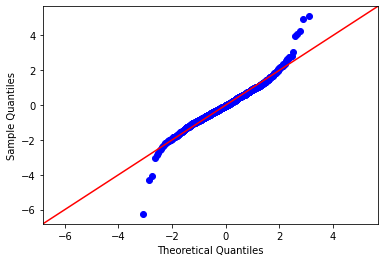

In [36]:
#학습데이터의 잔차 확인
res=fitted_full_model.resid#residual
pred_y=fitted_full_model.predict(train_x)

# q-q plot #정규분포확인
fig=sm.qqplot(res,fit=True,line='45')


Text(0, 0.5, 'Residual')

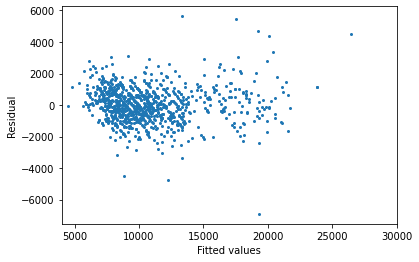

In [39]:
#residual pattern 확인
import matplotlib.pyplot as plt
fig=plt.scatter(pred_y,res,s=4)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [40]:
##검증데이터에 대한 예측
pred_y=fitted_full_model.predict(test_x)

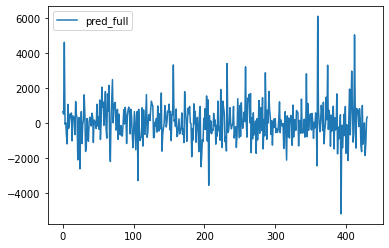

In [42]:
plt.plot(np.array(test_y-pred_y),label="pred_full")
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error

In [46]:
mean_squared_error(y_true=test_y,y_pred=pred_y)

1208226.8602720292

## 변수선택법

In [49]:
def processSubset(X,Y,feature_set):
    model=sm.OLS(Y,X[list(feature_set)])#medeling
    regr=model.fit()
    AIC=regr.aic#모델의 AIC
    return {"model":regr,"AIC":AIC}

print(processSubset(X=train_x,Y=train_y,feature_set=feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000016FE9F16340>, 'AIC': 18985.138502439546}
